# OC PROJET 4 - CLIENT SEGMENTATION
#### SIMULATION NOTEBOOK
<br></br>
### SOMMAIRE
- <a href="#C1">I. Simulation</a>
    - 1. 
    - 2. 
    - 3.
    
- <a href="#C2">II. Proposition de Maintenance</a>
     - 1. 
     - 2.
     - 3. 
     - 4.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

<font size="5">Paramétrages Data Visualisation</font>

In [63]:
# Créer un objet de police avec le nom de fichier de la police TrueType
optima_font = fm.FontProperties(fname=r'C:\Users\Oliver\Downloads\OptimaMedium.ttf')

# Ajouter une ombre à la police
shadow = path_effects.withSimplePatchShadow(offset=(1,-0.75), shadow_rgbFace='darkblue', alpha=0.25)

# Utiliser la police dans les graphiques, changer la couleur et augmenter la résolution d'affichage
plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.style.use('dark_background')
# set le theme seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.2','text.color': 'white','figure.figsize': (20, 16)})
plt.rcParams['figure.facecolor'] = '0.2'
# définition des paramètres kwargs typo
text_kwargs = dict(ha='center', va='center', fontsize=10, color='white')

# suppression de l'affichage max des colonnes
pd.set_option('display.max_columns', None)

In [2]:
# chargement du df master et conversion des variables temporelles au format datetime

df = pd.read_csv('olist_master.csv')

df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])
df['order_delivered_datetime'] = pd.to_datetime(df['order_delivered_datetime'])
df['review_creation_datetime'] = pd.to_datetime(df['review_creation_datetime'])

# TEST DE K MEANS SUR 3 PERIODES DE 6 MOIS

In [4]:
df['order_purchase_datetime'].max()

Timestamp('2018-08-29 15:00:37')

In [5]:
df['order_purchase_datetime'].min()

Timestamp('2016-10-03 09:44:50')

In [3]:
# Convertir la colonne 'order_purchase_datetime' en format de date
df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])

# Filtrer les échantillons pour chaque critère
df_1st_sem_2017 = df[(df['order_purchase_datetime'].dt.year == 2017) & (df['order_purchase_datetime'].dt.month <= 6)]
df_2nd_sem_2017 = df[(df['order_purchase_datetime'].dt.year == 2017) & (df['order_purchase_datetime'].dt.month > 6)]
df_1st_sem_2018 = df[(df['order_purchase_datetime'].dt.year == 2018) & (df['order_purchase_datetime'].dt.month <= 6)]

In [7]:
df_1st_sem_2017.shape

(14868, 30)

In [14]:
df_2nd_sem_2017.shape

(31452, 30)

In [15]:
df_1st_sem_2018.shape

(42492, 30)

# SIMULATION SEMESTRE 1 2017

C:\Users\Oliver\AppData\Local\Temp\ipykernel_14920\363266446.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


Nombre de clients par cluster:
1    9306
0    2714
2    2702
3     146
Name: cluster, dtype: int64


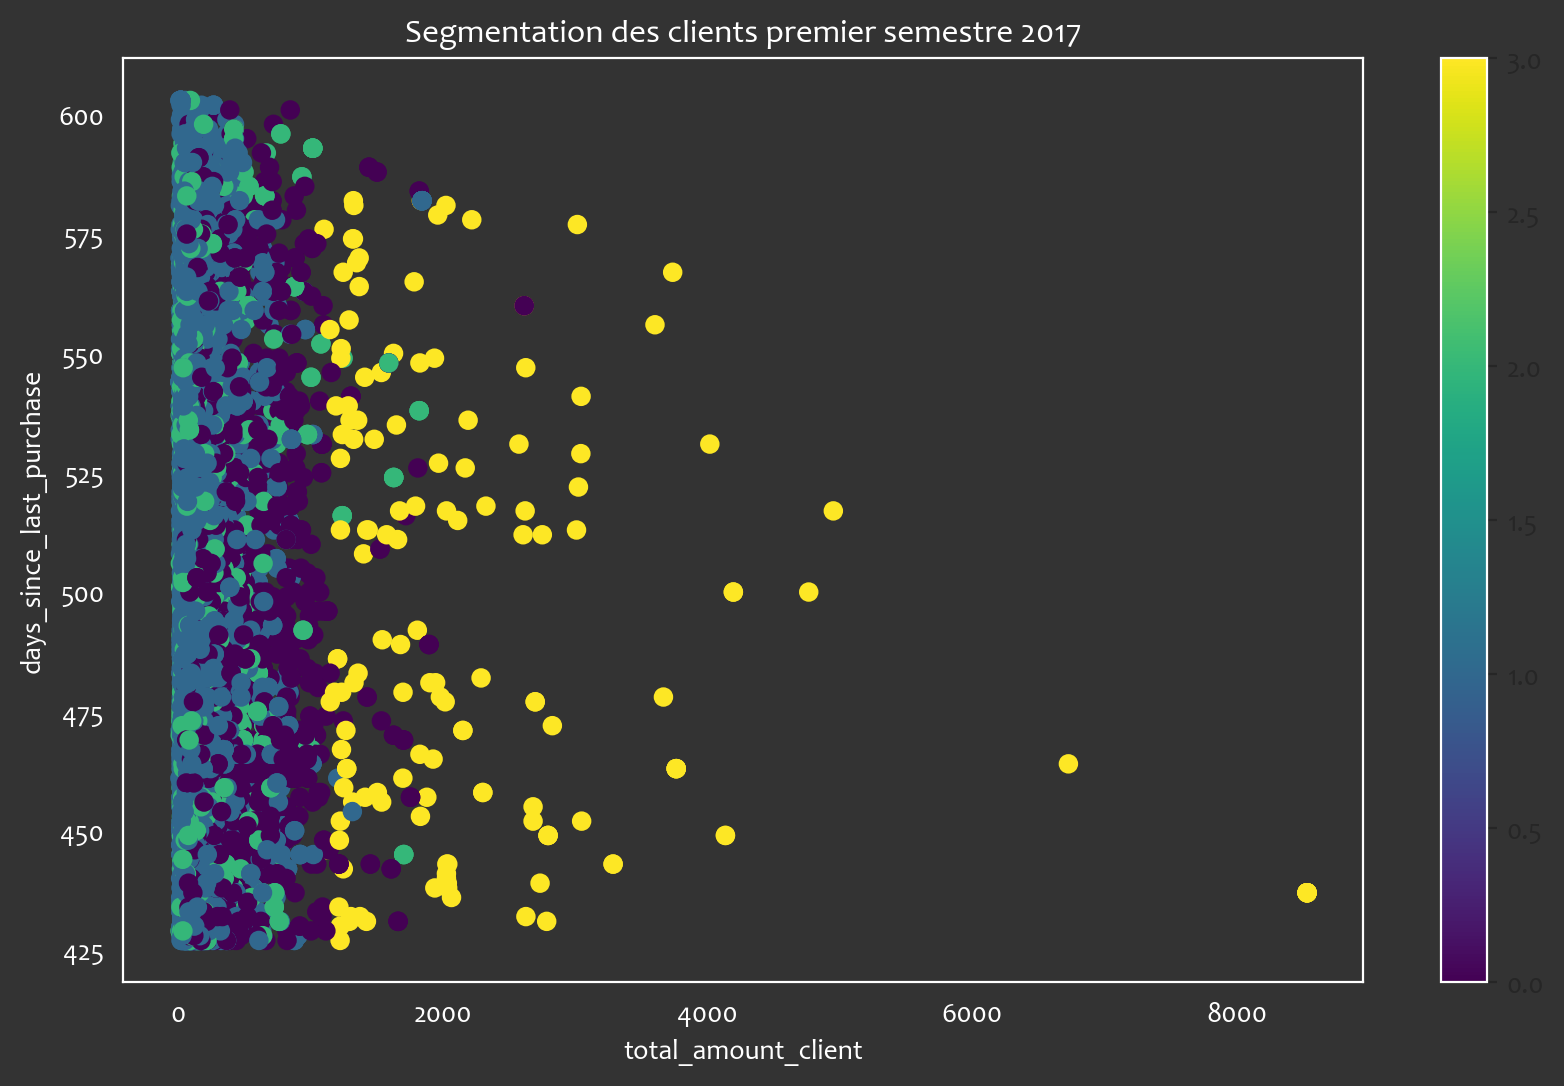

In [71]:
# Chargement des données
data = df_1st_sem_2017

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('total_amount_client', color = 'white')
plt.ylabel('days_since_last_purchase', color = 'white')
plt.title('Segmentation des clients premier semestre 2017')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

# SIMULATION SEMESTRE 1 2017

C:\Users\Oliver\AppData\Local\Temp\ipykernel_14920\1066141081.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


Nombre de clients par cluster:
1    13993
2    11358
0     5031
3     1070
Name: cluster, dtype: int64


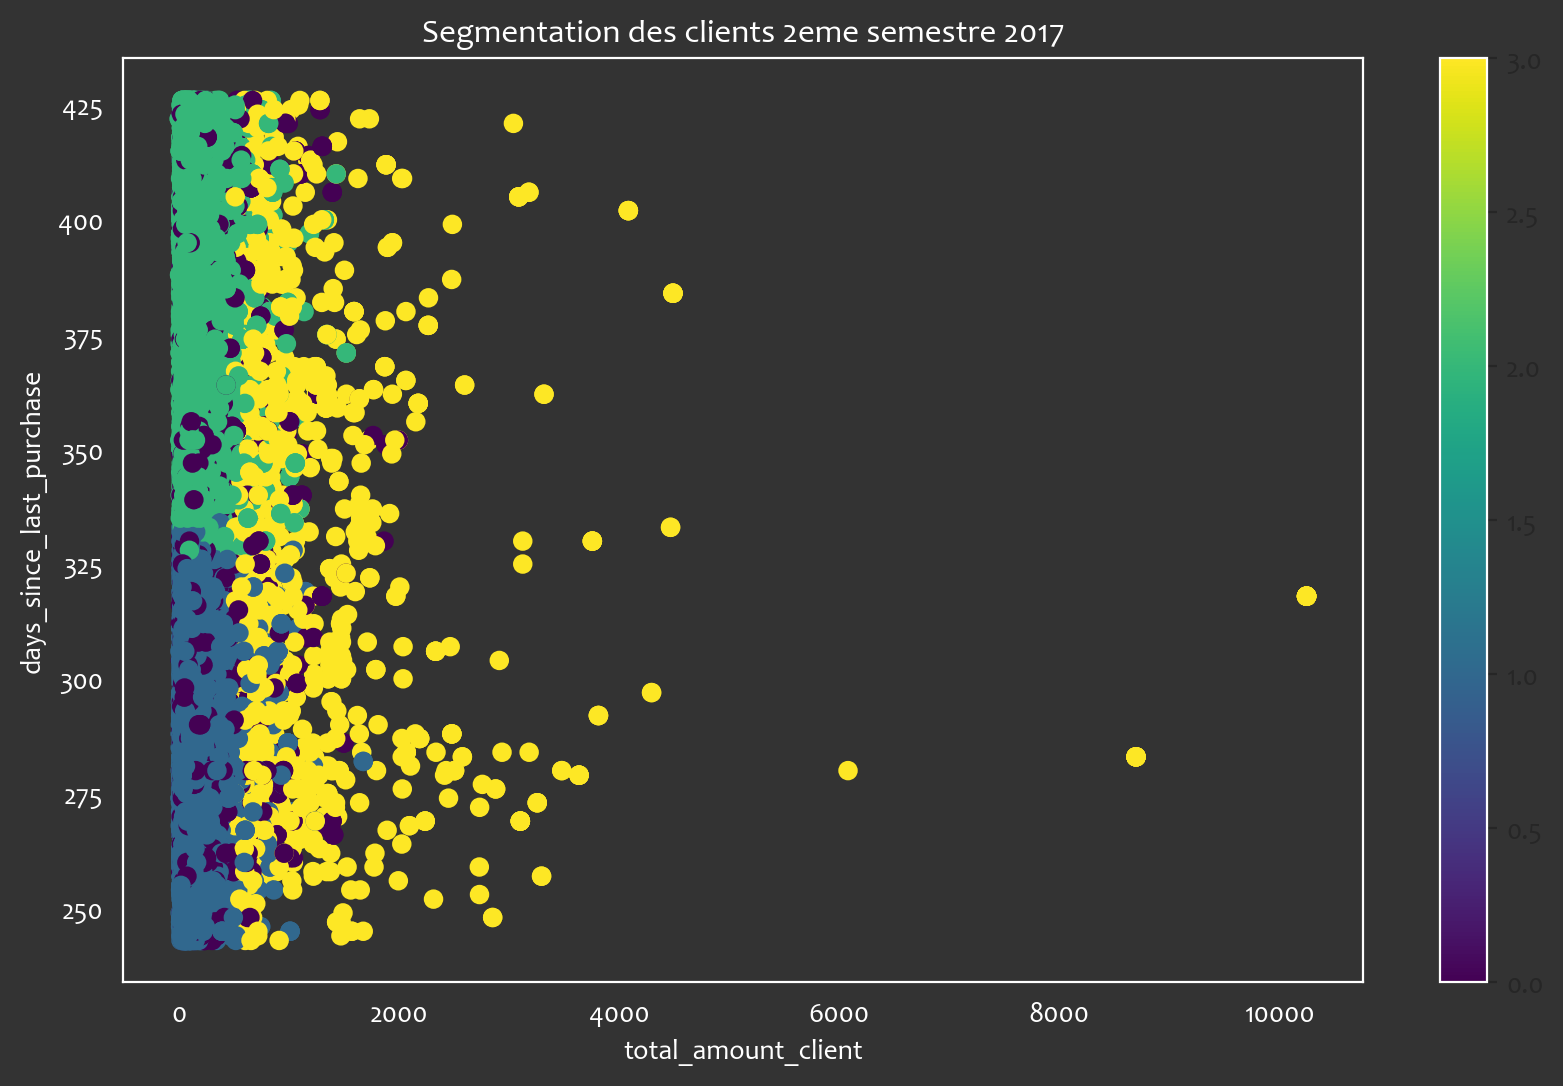

In [70]:
# Chargement des données
data = df_2nd_sem_2017

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('total_amount_client', color = 'white')
plt.ylabel('days_since_last_purchase', color = 'white')
plt.title('Segmentation des clients 2eme semestre 2017')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

C:\Users\Oliver\AppData\Local\Temp\ipykernel_14920\1632369786.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


Nombre de clients par cluster:
1    17604
2    16211
0     7201
3     1476
Name: cluster, dtype: int64


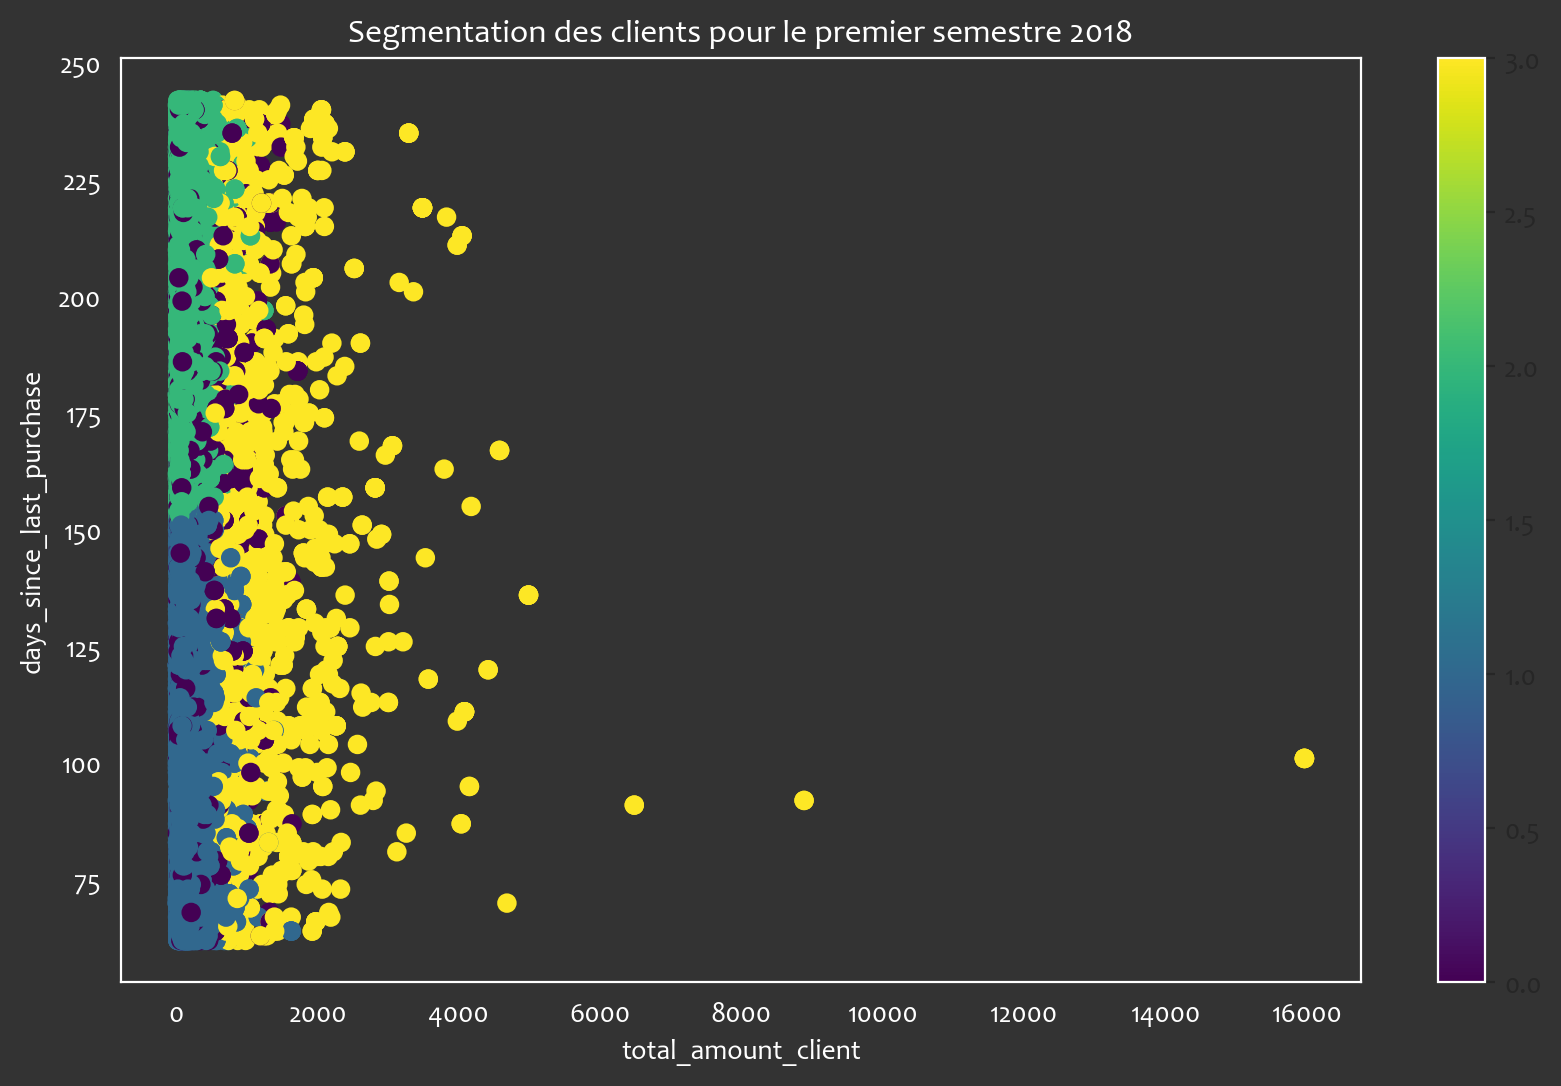

In [69]:
# Chargement des données
data = df_1st_sem_2018

# Sélection des colonnes pertinentes pour la segmentation
selected_columns = ['total_amount_client', 'review_score', 'days_since_last_purchase', 'payment_installments', 'price']
X = data[selected_columns]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('total_amount_client', color = 'white')
plt.ylabel('days_since_last_purchase', color = 'white')
plt.title('Segmentation des clients pour le premier semestre 2018')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()